<a href="https://colab.research.google.com/github/Data-Science-Apprentices/Alisha-Assignment-2/blob/main/Assignment2_Alisha_Bryden.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **My EDA Assignment**

# Code to write in data file

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

discharge_by_ward_overview = 'https://raw.githubusercontent.com/Data-Science-Apprentices/Alisha-Assignment-2/refs/heads/main/Exemplar%20patient%20month%20and%20week%20(1).csv%2012%20months%20.csv'
df = pd.read_csv(discharge_by_ward_overview)


# Pre processing

In [ ]:
print(df.columns)
#rename the column names using a dictiornary to replace the current names
df.rename(columns={'Unnamed: 0': 'Ward', 'Unnamed: 1': 'Year',
                   'Unnamed: 2': 'Month', 'Unnamed: 3': 'Division'},
           inplace=True)

print(df.columns)
print(df['Ward'].unique()) # unique makes ignores the duplicates
print(df['Month'].unique())

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Discharges before 10am', 'Discharges before 10am %',
       'Discharges before 11am', 'Discharges before 11am %',
       'Discharges before 12pm', 'Discharges before 12pm %',
       'Discharges before 5pm', 'Discharges before 5pm %',
       'Discharges between 12pm and 9pm ', 'Discharges between 12pm and 9pm %',
       'Total Discharges'],
      dtype='object')
Index(['Ward', 'Year', 'Month', 'Division', 'Discharges before 10am',
       'Discharges before 10am %', 'Discharges before 11am',
       'Discharges before 11am %', 'Discharges before 12pm',
       'Discharges before 12pm %', 'Discharges before 5pm',
       'Discharges before 5pm %', 'Discharges between 12pm and 9pm ',
       'Discharges between 12pm and 9pm %', 'Total Discharges'],
      dtype='object')
['RJ7 Allingham' 'RJ7 Amyand' 'RJ7 Belgrave' 'RJ7 Benjam Weir'
 'RJ7 Brodie Ward' 'RJ7 Caroline' 'RJ7 Cavell' 'RJ7 Champneys'
 'RJ7 Cheselden' 'RJ7 Flr Ngtg

In the above code I called the column names from the dataframe. I recognised that some of the names from the intial data set had not pulled through correctly. I ammended this and reprinted the column names to confirm the changes. I also double checked what wards were included in the data.

In [ ]:
#List of the months to be called on
months = ['Dec-24', 'Jan-25', 'Feb-25', 'Mar-25', 'Apr-25', 'May-25', 'Jun-25',
          'Jul-25', 'Aug-25', 'Sep-25', 'Oct-25', 'Nov-25']

# Created an empty dictionary
filtered_dfs = {}

# craeted an empty dictionary for all the totals
totals = {}

mean = {}

#For loop to go through all months in the orignal dataframe and makes
#a new dictionary key of that month all with the values from the og df
for month in months:
    filtered_dfs[month] = df.loc[df['Month'] == month]
    #updates the totals dictionary with the month as key
    #the value for each key is then the sum of the total discharges from og df
    totals[month] = filtered_dfs[month]['Total Discharges'].sum()

    # calculates the mean number of discharges each month
    mean[month] = filtered_dfs[month]['Total Discharges'].mean()

#convert the dictionaries back to a dataframe
# the list function joins the key and value in to one item
#this is then converted to a df with the coloumns 'Month' and 'Total Discharges'
totals_df = pd.DataFrame(list(totals.items()),
                         columns=['Month', 'Total Discharges'])

#converts dictionary to a dataframe
mean_df = pd.DataFrame(list(mean.items()),
                         columns=['Month', 'Mean Discharges'])

print(mean_df)
#Empty dictionaries for the different discharge times
before_10 = {}
before_11 = {}
before_12 = {}
twelve_to_9 = {}

# For loop to find the sum of the different discharge times for each month
for month in months:
    filtered_dfs[month] = df.loc[df['Month'] == month]

    before_10[month] = filtered_dfs[month]['Discharges before 10am'].sum()
    before_11[month] = filtered_dfs[month]['Discharges before 11am'].sum()
    before_12[month] = filtered_dfs[month]['Discharges before 12pm'].sum()
    twelve_to_9[month] = filtered_dfs[month]['Discharges between 12pm and 9pm '].sum()



# Combine all dictionaries into one dictionary where the keys are the months
# for months in months required to pull the sums for different month
data = {
    'Month': months,
    'Discharges before 10am': [before_10[month] for month in months],
    'Discharges before 11am': [before_11[month] for month in months],
    'Discharges before 12pm': [before_12[month] for month in months],
    'Discharges between 12pm and 9pm ': [twelve_to_9[month]for month in months],
    'Total Discharges': [totals[month] for month in months]
}

# Convert the dictionary to a DataFrame
different_time_categories = pd.DataFrame(data)





     Month  Mean Discharges
0   Dec-24       109.043478
1   Jan-25       102.173913
2   Feb-25        92.782609
3   Mar-25       106.260870
4   Apr-25       102.826087
5   May-25       111.260870
6   Jun-25       108.391304
7   Jul-25       107.086957
8   Aug-25       112.333333
9   Sep-25       109.238095
10  Oct-25       109.636364
11  Nov-25        80.809524


Above I have made 2 new dataframes to be used later in the code. I was able to calculate the sum of all discharges and discharges at different time frames for each month.

# Plots

**Bar chart showing the total amount of discharges each month across the entire hospital**

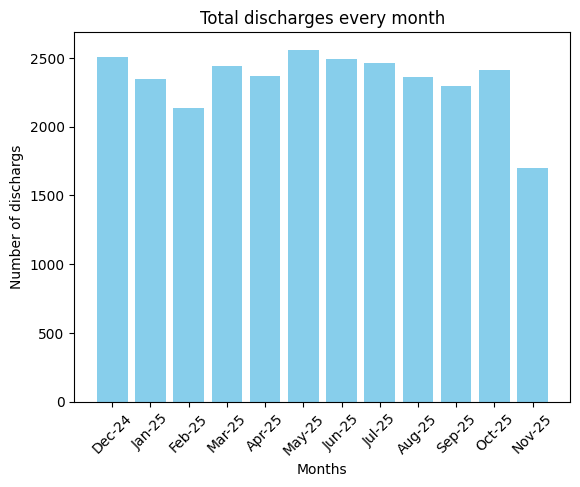

In [ ]:
# Use of matplotlib to to plot a bar chart using the new totals dataframe
plt.bar(totals_df['Month'], totals_df['Total Discharges'], color='skyblue')
plt.title("Total discharges every month")
plt.xlabel("Months")
plt.xticks(rotation=45) #rotates the X values
plt.ylabel("Number of dischargs")
plt.show()

The above chart shows the slight variations in discharges across the months. Novemebers number is currently inaccuarate as the data was pulled midway through the month. Our discharge profile across the year stays relatively steady. There are peaks in May and December and lowest discharge profile fell in February. The overall discharge profile appears to be relatively steady across the year.

**Pie chart to show the percetage distribution of discharges through the months**

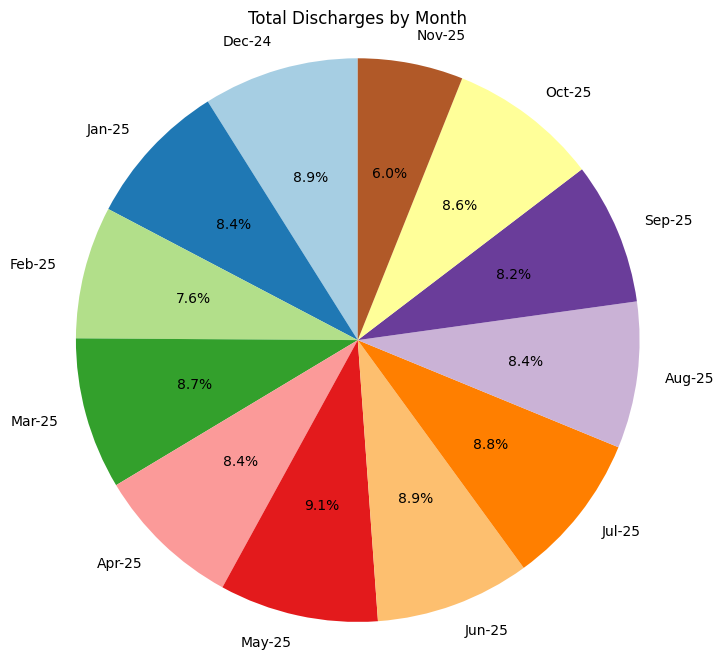

In [ ]:
#set the sizes of the pie chart from the data frame
sizes = different_time_categories['Total Discharges']
#label each section using the data frame
labels = different_time_categories['Month']

# Plot the pie chart
plt.figure(figsize=(8, 8))
#calculates the percetage of each section to 1 decimal point
#starts the pie chart at the top
#then calls a paired colour map
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        startangle=90, colors=plt.cm.Paired.colors)


plt.title('Total Discharges by Month')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The pie chart echos the above bar chart in showing there is very slight variation in the discharge profile across the months. In all months except February and November(likely due to the incomplete data set for this month) the pie chart shows that more than 8% of the yearly discharges fall in each month. It clearly depicts May as having the highest discharge profile, but more clearly showcases how closely June, July and December do follow behind it. This leads to the conclusion that during the spring/summer months the discharge profile remains high as opposed to the Autmn/Winter months where there is slight reduction that then rises again in December, then dips again in the following months. Due to this slight variation a comparison to the admission data across the months would be beneficial in analysing if there is a higher intake of patients during the months in which we are discharging the highest proportion of patients. This is one way this study can be continued.

**Bar chart comparing the time of discharges every month**

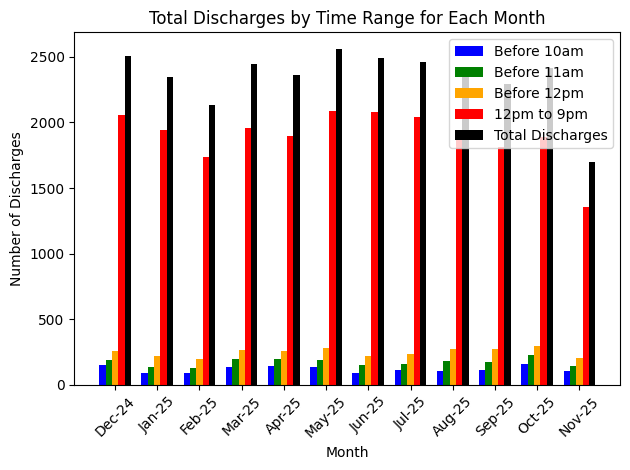

In [ ]:
# to be used as the X axis from the data frame
months = different_time_categories['Month']

# sets the bar width and spacing
bar_width = 0.15
group_spacing = 0.3
# to be used to set the x axis across the amount of months
index = np.arange(len(months))


# index is the centre of the x axis space for each value
# each bar plotted at using different distance from the index so doesnt overlap
#time group to be plotted
plt.bar(index - 2*bar_width,
        different_time_categories['Discharges before 10am'],
        bar_width, label='Before 10am', color='blue')

plt.bar(index - bar_width,
        different_time_categories['Discharges before 11am'],
        bar_width, label='Before 11am', color='green')

plt.bar(index,
        different_time_categories['Discharges before 12pm'],
        bar_width, label='Before 12pm', color='orange')

plt.bar(index + bar_width,
        different_time_categories['Discharges between 12pm and 9pm '],
        bar_width, label='12pm to 9pm', color='red')

plt.bar(index + 2*bar_width, different_time_categories['Total Discharges'],
        bar_width, label='Total Discharges', color='black')

# plotting
plt.xlabel('Month')
plt.ylabel('Number of Discharges')
plt.title('Total Discharges by Time Range for Each Month')
plt.xticks(index, months, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



In every single month it is evident that the bulk of discharges occurred after midday. This is then followed by the discharges that happen between 11am and midday, then between 10am and 11am then before 10am. The bulk of discharges after midday is likely linked to ward rounds being completed by the doctors in the morning and test results then being available in the afternoon allowing discharges to subsequently be confirmed. Discharges before 10am are most likely confirmed the previous day or failed from the previous day, as it unlikely for a ward round to be completed prior to 10am. Another factor likely affecting the spread of discharges is transport, if not booked the previous day it takes longer for the transport to show up. To further explore this data, it would be of interest to compare the transporting booking data and discharge dependent medical requests. These both could potentially be factors impacting the current results and be beneficial in implementing new procedures to increase our early morning discharges. External factors such as confirmations of packages of care could also impact this data as our TOC hub has daily meetings with external partners at 11am in which some packages of care are confirmed which would then allow discharges

**Heat map to show the correlation between months and time of discharges across the entire hospital**

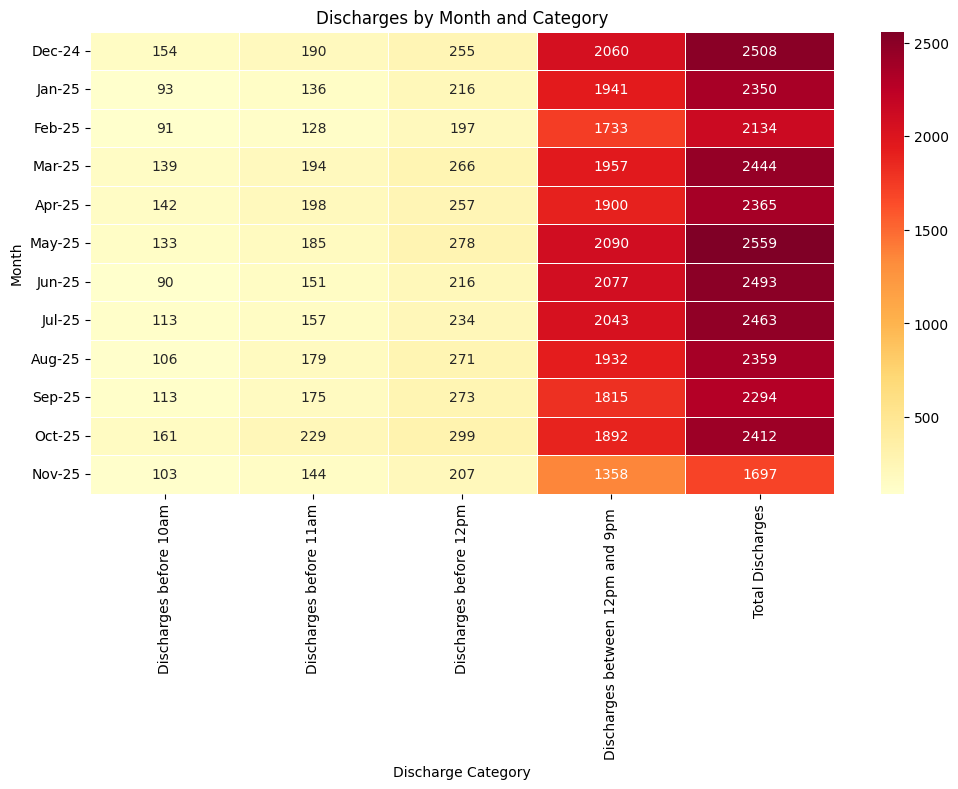

In [ ]:
import seaborn as sns

#Dataframe use to plot the heat map: rows = months
heatmap_data = different_time_categories.set_index('Month')

# Plot heatmap
plt.figure(figsize=(12, 6))
#annot writes the numbers, fmt dislays the whole numbers
#cmap sets the colours and linewidths as the white thin line
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlOrRd", linewidths=0.5)

plt.title("Discharges by Month and Category")
plt.xlabel("Discharge Category")
plt.ylabel("Month")
plt.show()

This heat map further shows the consistent correlation through the months of the bulk of discharges happening in the afternoon. It also highlights again May and December having the highest amount of discharges.


**Bar chart comparing the time of discharges every month on Amyand Ward**

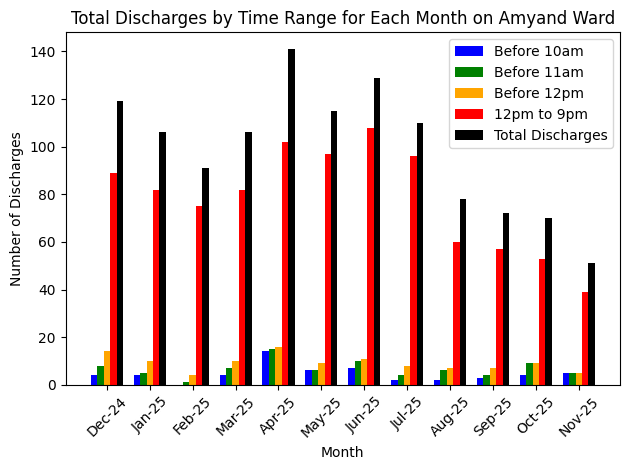

In [ ]:
#Make a new dataframe with only the data for Amyand ward

amyand_df = df.loc[df['Ward'] == 'RJ7 Amyand']

# to be used as the X axis from the data frame
months = amyand_df['Month']


# sets the bar width and spacing
bar_width = 0.15
group_spacing = 0.3
# to be used to set the x axis across the amount of months
index = np.arange(len(months))


# index is the centre of the x axis space for each value
# each bar plotted at using different distance from the index so doesnt overlap
#time group to be plotted
plt.bar(index - 2*bar_width,
        amyand_df['Discharges before 10am'],
        bar_width, label='Before 10am', color='blue')

plt.bar(index - bar_width,
        amyand_df['Discharges before 11am'],
        bar_width, label='Before 11am', color='green')

plt.bar(index,
        amyand_df['Discharges before 12pm'],
        bar_width, label='Before 12pm', color='orange')

plt.bar(index + bar_width,
        amyand_df['Discharges between 12pm and 9pm '],
        bar_width, label='12pm to 9pm', color='red')

plt.bar(index + 2*bar_width, amyand_df['Total Discharges'],
        bar_width, label='Total Discharges', color='black')

# Labeling and styling
plt.xlabel('Month')
plt.ylabel('Number of Discharges')
plt.title('Total Discharges by Time Range for Each Month on Amyand Ward')
plt.xticks(index, months, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Amyand ward's highest discharge profile was in April, followed by June then December. Their lowest discharge profile was in August, September and October. This differs slightly compared to the overall discharge profile in the entire hospital as the discharge profile had stayed relatively stable in these months. Amyand is an acute medical ward so, it would be beneficial to compare the amount of medical patient admitted in these months, to assess if this was a factor causing this variation. Amyand also rotates consultants, so analysing the type of discharges and delays across the months would also be beneficial to assess if the consultant in April did anything differently that improved the discharge profile. Coming into winter flu and covid cases do increase typically so it would also be beneficial to review if there were any bed closures across the year affecting the intake of patients into the ward.

Throughout the year Amyand was able to discharge patients before 10am, except in February, before 11am and before 12am. Whereas the trend in the entire hospital was that more discharges happened the later during the day, Amyand did not consistently follow this trend every month and were able to discharge a similar number of patients before 11am and before 12 am and sometimes even before 10am as well.


**Pie chart to show the percetage distribution of discharges through the months for Amyand Ward**

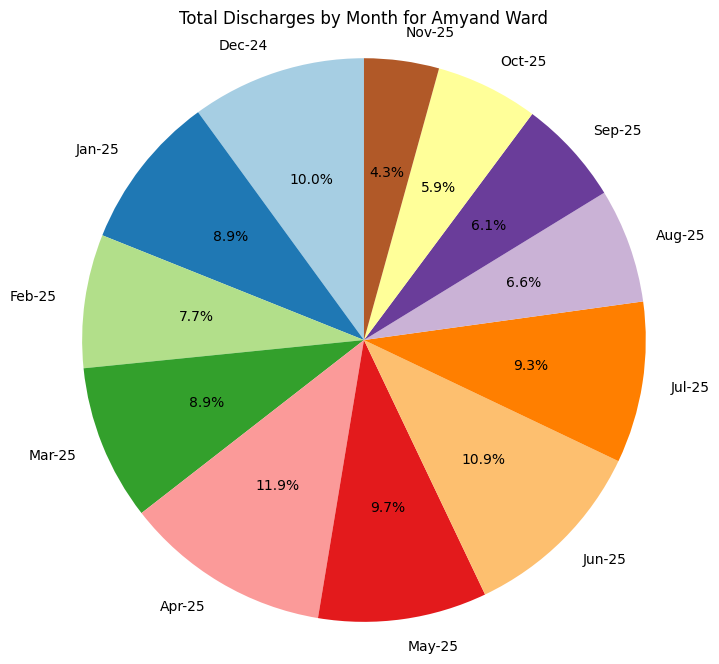

In [ ]:
#set the sizes of the pie chart from the data frame
sizes = amyand_df['Total Discharges']
#label each section using the data frame
labels = amyand_df['Month']

# Plot the pie chart
plt.figure(figsize=(8, 8))
#calculates the percetage of each section to 1 decimal point
#starts the pie chart at the top
#then calls a paired colour map
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)


plt.title('Total Discharges by Month for Amyand Ward')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The pie chart echo's the variation in discharge profiles over the months in Amyand ward compared to the entire hospital. Whereas in the entire hospital the discharges were relatively evenly distributed throughout the year, Amyand had a clear variation with some months dropping below 7% of the yearly discharges. If discharges were spread evenly between all months, each month would have 8.3% of the yearly discharges.

**Scatter chart comparing the mean amount of discharges per month to Amyand Ward**

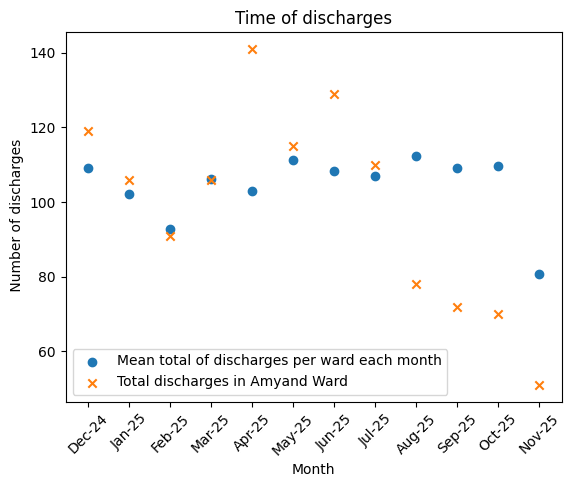

In [ ]:
#Selecting the mean discharge totals to be plotted on y axis
y = mean_df['Mean Discharges']

#Selecting Amyands total discharges to be plotted on y axis
z = amyand_df['Total Discharges']

#Setting months as the x-axis
x = different_time_categories['Month']

#Plotting both sets of data with different Markers
plt.scatter(x, y, label= "Mean total of discharges per ward each month",
            marker='o')
plt.scatter(x, z, label= "Total discharges in Amyand Ward", marker='x')


#Seting the plot
plt.ylabel(' Number of discharges')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.title('Time of discharges')
plt.legend()
plt.show()

The scatter chart shows that during January, February, May and July Amyand's discharge profile was similar to the average across the hospital. In December, April and June they had higher than the average amount of discharges across the hospital. Then in August, September, October and November (data set not complete) they fell significantly below average. So overall, Amyand did perform well at discharges majority of the year, but it appears that something has impacted their discharge profile since August. In order to figure out exactly what was the reason for this significant change, we will need to analyse the data on medical admissions, reasons for discharge delays and infection prevention protocols that were in place.

# Unused plots

**Heat map to show the correlation between months and time of discharges across the entire hospital**

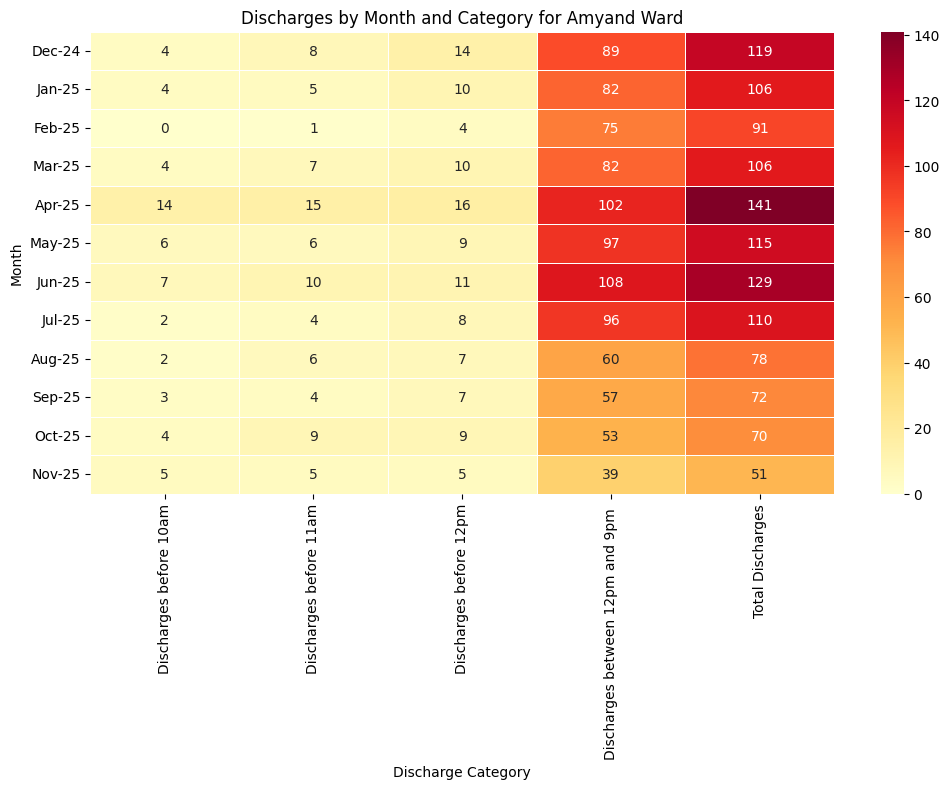

In [ ]:
# Select only the columns with numeric discharge data
categories = [
    'Discharges before 10am',
    'Discharges before 11am',
    'Discharges before 12pm',
    'Discharges between 12pm and 9pm ',
    'Total Discharges'
]

# Heatmap-ready dataframe: rows = months, columns = categories
heatmap_data = amyand_df.set_index('Month')[categories]

# Plot heatmap
plt.figure(figsize=(12, 6))
#annot writes the numbers, fmt dislays the whole numbers
#cmap sets the colours and linewidths as the white thin line
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlOrRd", linewidths=0.5)

plt.title("Discharges by Month and Category for Amyand Ward")
plt.xlabel("Discharge Category")
plt.ylabel("Month")
plt.show()

I made at heat map to showcase the correlation between months and discharge times on Amyand Ward. I chose not to use this plot in my final presentation as I felt the bar chart and pie chart was able to showcase this correlation.

**Scatter chart to show case the different discharge times across the hospital**

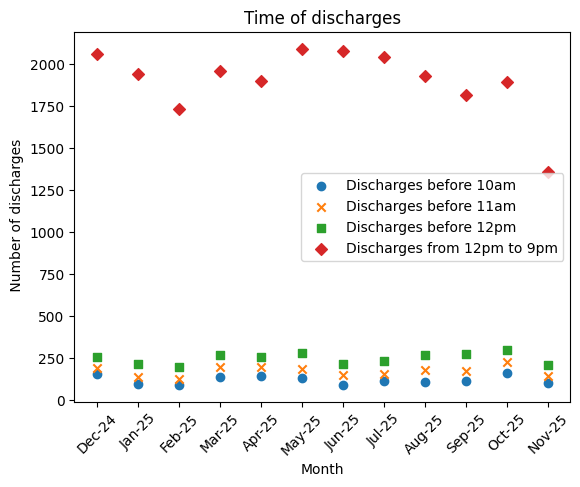

In [ ]:
y = different_time_categories['Discharges before 10am']
z = different_time_categories['Discharges before 11am']
w = different_time_categories['Discharges before 12pm']
Q = different_time_categories['Discharges between 12pm and 9pm ']
x = different_time_categories['Month']

plt.scatter(x, y, label= "Discharges before 10am", marker='o')
plt.scatter(x, z, label= "Discharges before 11am", marker='x')
plt.scatter(x, w, label= "Discharges before 12pm", marker='s')
plt.scatter(x, Q, label= "Discharges from 12pm to 9pm", marker='D')

plt.ylabel(' Number of discharges')
plt.xlabel('Month')
plt.xticks(rotation=45)

plt.title('Time of discharges')
plt.legend()
plt.show()


I chose not to use this scatter chart in my final presentation as the bar chart was able to represent the variation in discharge times more clearly as the information was shown side by side as opposed to vertically in the scatter chart. Due to this I felt it was easier to compare the values in the bar chart.

**Tree map to show the variation in discharges across the months**

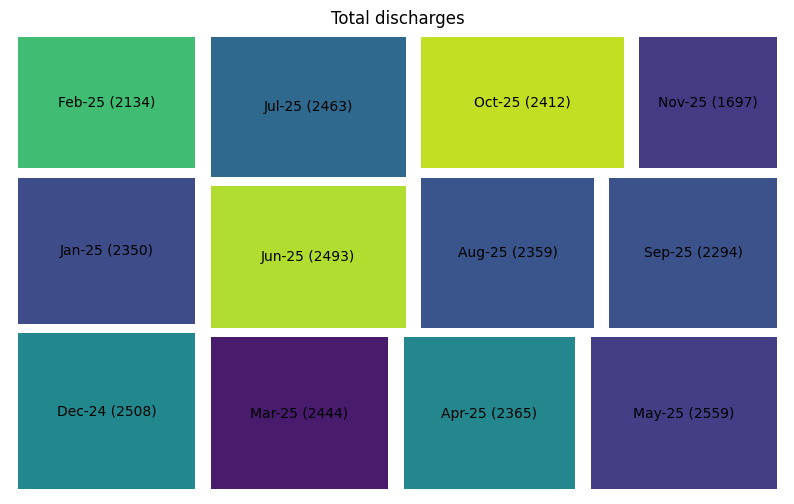

In [ ]:
# installing the squarify package and imports the libray to draw a tree map
!pip install squarify
import squarify

#sets the size of the blank treemap
plt.figure(figsize=(10,6))

#draws the tree map pad makes the rectangles not touch
squarify.plot(
    sizes=different_time_categories['Total Discharges'],
    label=different_time_categories['Month'].astype(str) +
    " (" + different_time_categories['Total Discharges'].astype(str) + ")",
    pad=True
)
plt.title("Total discharges")

#Turns off axis as not required
plt.axis("off")
plt.show()

I tried to use a tree map to show the differentiation between total discharges across the months. As the months total were so similar in numbers the tree map did not add any further emphasis on the slight variations that the bar chart had already shown. Due to this I chose not to use it in my final presentation